In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

2025-07-29 03:26:03.888460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753759564.192967      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753759564.284628      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
#Load and preprocess the data
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [16]:
train_images,test_images=train_images/255.0, test_images/255.0

In [17]:
#Visualize the Data
class_names=['airplane','automobile','bird','car','deer','dog','frog','horse','ship','truck']

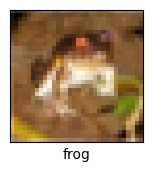

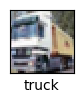

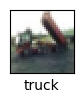

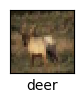

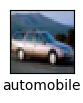

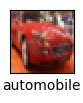

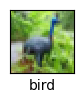

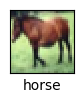

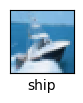

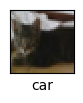

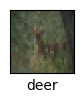

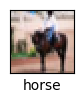

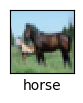

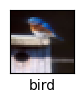

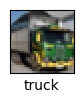

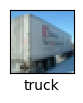

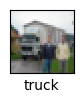

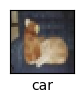

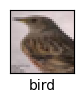

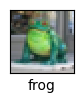

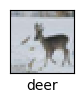

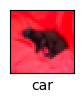

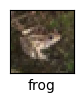

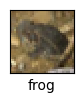

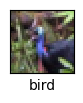

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

In [23]:
#Build the CNN Model
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

In [25]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#Train the model
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.3324 - loss: 1.7872 - val_accuracy: 0.5239 - val_loss: 1.3099
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5589 - loss: 1.2432 - val_accuracy: 0.6089 - val_loss: 1.1013
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6203 - loss: 1.0736 - val_accuracy: 0.6551 - val_loss: 0.9971
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6674 - loss: 0.9494 - val_accuracy: 0.6678 - val_loss: 0.9524
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6961 - loss: 0.8636 - val_accuracy: 0.6821 - val_loss: 0.9190
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7156 - loss: 0.8055 - val_accuracy: 0.6730 - val_loss: 0.9479
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7403 - loss: 0.7398 - val_accuracy: 0.7020 - val_loss: 0.8694
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7559 -

In [29]:
#Evaluate the model
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(f'Test accuracy:{test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.7163 - loss: 0.8520
Test accuracy:0.7163000106811523


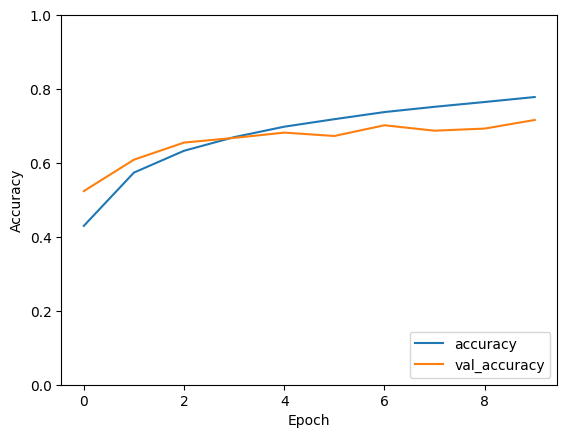

In [30]:
#plot the training history
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()